In [31]:
# Libraries
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'


## Personal Info Exploratory Analysis for patients

In [32]:
#helper function that creates bar charts
def my_graph(y,x,title,sizeX,sizeY,prin):


    # Figure Size
    fig, ax = plt.subplots(figsize =(sizeX, sizeY))

    # Horizontal Bar Plot
    ax.barh(y, x,color=(0.0, 0.4, 0.6, 0.6))

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    #ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 1)
    ax.yaxis.set_tick_params(pad = 10)
    ax.set_xticklabels([])
    
    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.9,
            alpha = 0.2)

    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.01, i.get_y()+0.40,
                str(round((i.get_width()), 1))+'%',
                fontsize = 10, fontweight ='bold',
                color ='black')
    

    # Add Plot Title
    ax.set_title(title,
                loc ='left', )
    
    if(prin == 1):
        plt.tight_layout()
        plt.savefig('personal.png')
        

    # Show Plot
    plt.show()



In [33]:
%store -r patients_personalInfo

In [34]:
patients_personalInfo


,sex,age,education,family,occupation,income,nationality,nursing field,nursing days,safety evaluation,comments,nursing_days_group,age_group
0,2,30.0,8.0,3.0,1.0,2.0,2,1.0,5.0,5.0,oxi,0-5,20-40
1,2,72.0,4.0,3.0,3.0,1.0,1,2.0,7.0,3.0,Περιστέρια στον θάλαμο,5-10,60-80
2,2,58.0,3.0,3.0,1.0,1.0,1,2.0,6.0,5.0,oxi,5-10,40-60
3,2,71.0,1.0,3.0,3.0,1.0,1,2.0,7.0,5.0,Peristeria ston thalamo,5-10,60-80
4,2,72.0,1.0,3.0,3.0,1.0,1,2.0,7.0,5.0,peristeria ston thalamo,5-10,60-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2,NaN,3.0,3.0,3.0,1.0,1,1.0,NaN,4.0,NaN,NaN,NaN
169,2,67.0,1.0,2.0,3.0,1.0,1,2.0,4.0,3.0,oxi,0-5,60-80
170,2,NaN,5.0,2.0,1.0,1.0,3,3.0,3.0,3.0,oxi,0-5,NaN
171,1,51.0,4.0,3.0,1.0,1.0,1,2.0,8.0,5.0,oxi,5-10,40-60


In [35]:
# GENDER

gender = patients_personalInfo['sex']

absolute_frequencies = gender.value_counts()
relative_frequencies = gender.value_counts(normalize=True)

In [36]:
relative_frequencies

1    0.560694
2    0.439306
Name: sex, dtype: float64

In [37]:
relative_frequencies.index = ['Άνδρας','Γυναίκα']

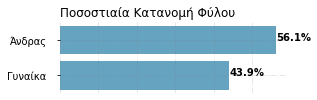

In [38]:
data = relative_frequencies*100
labels = relative_frequencies.index


my_graph(labels,data,"Ποσοστιαία Κατανομή Φύλου",4.5,1.5,1)

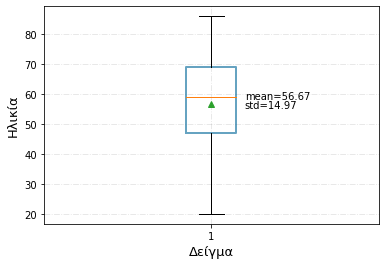

In [39]:
# AGE
data = patients_personalInfo['age'].dropna().astype(int)


#rm ouliers
q = data.quantile(0.99)
data = data[data < q]

fig1, ax1 = plt.subplots()
ax1.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.9,
        alpha = 0.2)

bp = ax1.boxplot(data,showmeans=True)

for box in bp['boxes']:
    # change outline color
    box.set(color=(0.0, 0.4, 0.6, 0.6), linewidth=2)

label = ax1.set_ylabel('Ηλικία',fontsize='13')
label = ax1.set_xlabel('Δείγμα',fontsize='13')

# Calculate the mean and variance
mean = np.mean(data)
std = np.std(data)

# Annotate the plot with the mean and variance
ax1.text(1.1, mean + 1.5, f'mean={mean:.2f}')
ax1.text(1.1, mean - 1.5, f'std={std:.2f}')


plt.savefig('age')

plt.show()

In [40]:
#EDUCATION

education = patients_personalInfo['education']

absolute_frequencies = education.value_counts()
relative_frequencies = education.value_counts(normalize=True)

In [43]:
relative_frequencies

4.0    0.255814
7.0    0.186047
1.0    0.174419
6.0    0.127907
5.0    0.104651
3.0    0.098837
8.0    0.040698
2.0    0.011628
Name: education, dtype: float64

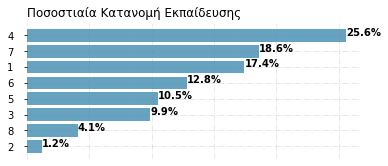

In [46]:
#define data
data = relative_frequencies*100
labels = ['4','7','1','6','5','3','8','2']


my_graph(labels,data,"Ποσοστιαία Κατανομή Eκπαίδευσης",6,2.5,0)

In [ ]:
#EDUCATION

family = patients_personalInfo['family']

absolute_frequencies = family.value_counts()
relative_frequencies = family.value_counts(normalize=True)

In [ ]:
#define data
data = relative_frequencies
labels = ["1","2","3"]

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [ ]:
#EDUCATION

occupation = patients_personalInfo['occupation']

absolute_frequencies = occupation.value_counts()
relative_frequencies = occupation.value_counts(normalize=True)

In [ ]:
#define data
data = relative_frequencies
labels = ["1","2","3"]

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [ ]:
#INCOME

income = patients_personalInfo['income']

absolute_frequencies = income.value_counts()
relative_frequencies = income.value_counts(normalize=True)

In [ ]:
#define data
data = relative_frequencies
labels = ["1","2"]

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [ ]:
#NATIONALITY

nationality = patients_personalInfo['nationality']

absolute_frequencies = nationality.value_counts()
relative_frequencies = nationality.value_counts(normalize=True)

In [ ]:
#define data
data = relative_frequencies
labels = ["1","2"]

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [ ]:
#NURSING FIELD

nursing_field = patients_personalInfo['nursing field']

absolute_frequencies = nursing_field.value_counts()
relative_frequencies = nursing_field.value_counts(normalize=True)

In [ ]:
#define data
data = relative_frequencies
labels = ["1","2"]

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [ ]:
#NURSING DAYS

nursing_field = patients_personalInfo['nursing days']

absolute_frequencies = nursing_field.value_counts()
relative_frequencies = nursing_field.value_counts(normalize=True)

In [ ]:
nursing_field

In [ ]:
absolute_frequencies